In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"devsasi","key":"fbb643cd963589a23c1f7c6489fbe392"}'}

In [0]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle

!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c cat-in-the-dat-ii

  0% 0.00/871k [00:00<?, ?B/s]
100% 871k/871k [00:00<00:00, 58.1MB/s]
 37% 9.00M/24.3M [00:00<00:01, 15.8MB/s]
100% 24.3M/24.3M [00:00<00:00, 38.4MB/s]
 31% 5.00M/16.1M [00:00<00:01, 11.5MB/s]
100% 16.1M/16.1M [00:00<00:00, 32.8MB/s]


In [0]:
import zipfile
files = ['train.csv','test.csv']
for f in files:
  with zipfile.ZipFile(f'/content/{f}.zip') as zip_ref:
    zip_ref.extractall('/content/')

In [0]:
import pandas as pd
from fastai.tabular import *

In [0]:
df = pd.read_csv('/content/train.csv',index_col='id')
df_test = pd.read_csv('/content/test.csv',index_col = 'id')
df.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,de4c57ee2,a64bc7ddf,598080a91,0256c7a4b,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,2bb3c3e5c,3a3a936e8,1dddb8473,52ead350c,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,b574c9841,708248125,5ddc9a726,745b909d1,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,673bdf1f6,23edb8da3,3a33ef960,bdaa56dd1,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,777d1ac2c,3a7975e46,bc9cc2a94,NaN,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [0]:
df.shape

(600000, 24)

In [0]:
cat_names =['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4', 'nom_0', 'nom_1', 'nom_2',
       'nom_3', 'nom_4', 'nom_5', 'nom_6', 'nom_7', 'nom_8', 'nom_9', 'ord_0',
       'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5', 'day', 'month']
cont_names = []
dep_var = 'target'
procs = FillMissing,Categorify,Normalize
FillMissing.fill_strategy= 'MEAN'

In [0]:
test = TabularList.from_df(df_test,cat_names=cat_names,cont_names=cont_names)

data = TabularList.from_df(df,cat_names=cat_names,cont_names=cont_names,procs=procs).split_by_idx(valid_idx= range(len(df)-12000,len(df))).label_from_df(cols=dep_var).add_test(test).databunch()

In [0]:
data.show_batch()

bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,nom_5,nom_6,nom_7,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0.0,0.0,0.0,F,Y,Blue,Circle,Lion,India,Theremin,78aac4316,f638a405b,5d5b262b1,bccfd92a2,e700318cc,1.0,Expert,Cold,a,Q,ly,3.0,6.0,0
0.0,0.0,1.0,F,N,Blue,Triangle,Axolotl,Finland,Theremin,2c39d8ba3,380c441d1,41901460a,e0c7234cf,c798edf1e,2.0,Novice,Warm,h,A,oJ,7.0,2.0,0
0.0,0.0,0.0,F,Y,Red,Circle,Lion,India,Theremin,1b1f90b18,77e7ed42e,1c756c04a,e6061cbe7,ce367ab61,1.0,Master,Boiling Hot,m,Y,uQ,1.0,2.0,1
0.0,0.0,1.0,F,Y,Red,Polygon,Lion,India,Theremin,8c5bd88e0,#na#,623908296,777ce63ea,296043473,1.0,Contributor,Warm,b,R,mi,7.0,5.0,0
1.0,0.0,0.0,F,Y,Red,Circle,Dog,Costa Rica,Bassoon,cdd853afd,f19837cf2,81d67e1bb,ee474d72d,e4bf32721,2.0,Novice,Lava Hot,h,I,QV,5.0,12.0,0


In [0]:
learn = tabular_learner(data,layers = [200,100],metrics=[accuracy,FBeta(average='weighted')])

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


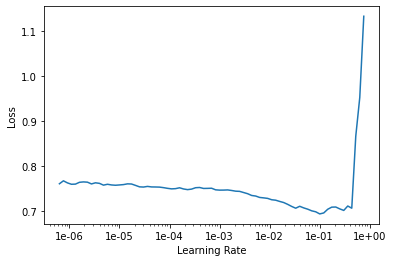

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4,1e-02)

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.408505,0.402830,0.824750,0.804601,01:39
1,0.409070,0.465513,0.824333,0.805737,01:40
2,0.401516,0.393053,0.827833,0.806426,01:39
3,0.384852,0.394359,0.828333,0.811870,01:41


In [0]:
a = df.iloc[10]
b = learn.predict(a)
b

(Category 0, tensor(0), tensor([0.7437, 0.2563]))

In [0]:
b[2][1]

tensor(0.2563)

In [0]:
preds = learn.get_preds(ds_type=DatasetType.Test)[0][:,1].numpy()

In [0]:
preds

array([0.094688, 0.266334, 0.151575, 0.154083, ..., 0.478183, 0.508665, 0.297023, 0.234129], dtype=float32)

In [0]:
submission1 = pd.DataFrame({'id':df_test.index,'target':preds})
submission1.to_csv('/content/sub1.csv', header=True, index=False)

Kaggle score is 0.78352
The winning score is 0.78820

To Be done next


*   encode binary features to 0 and 1
*   encode ordinal features to 1-hot
*   Convert day and month to date-time series
*   Feed to the model





